# Advanced Flight Delay Prediction Models

## Objective
Explore and compare advanced machine learning models for flight delay prediction

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data function
def load():
    df = pd.read_csv('../data/Airlines_updated.csv')
    return df

# Data splitting function
def get_split(df):
    # Separate features and target
    X = df.drop('Delay', axis=1)
    y = df['Delay']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    return X_train, X_test, y_train, y_test

In [5]:
# Load and prepare data
df = load()
X_train, X_test, y_train, y_test = get_split(df)

# Define column types
cat_cols = ['Airline', 'AirportFrom', 'AirportTo', 'Route', 'DayOfWeek']
num_cols = [c for c in X_train.columns if c not in cat_cols]

In [6]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", BinaryEncoder(), cat_cols)
])

# KNN Model
knn_pipe = Pipeline([
    ("pre", preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

# Decision Tree Model
dt_pipe = Pipeline([
    ("pre", preprocessor),
    ("dt", DecisionTreeClassifier(max_depth=10, random_state=42))
])

In [7]:
# Train and evaluate KNN
knn_pipe.fit(X_train, y_train)
knn_pred = knn_pipe.predict(X_test)
knn_prob = knn_pipe.predict_proba(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

# Train and evaluate Decision Tree
dt_pipe.fit(X_train, y_train)
dt_pred = dt_pipe.predict(X_test)
dt_prob = dt_pipe.predict_proba(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_pred))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70     59879
           1       0.62      0.58      0.60     47998

    accuracy                           0.66    107877
   macro avg       0.65      0.65      0.65    107877
weighted avg       0.66      0.66      0.66    107877


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72     59879
           1       0.66      0.56      0.60     47998

    accuracy                           0.67    107877
   macro avg       0.67      0.66      0.66    107877
weighted avg       0.67      0.67      0.67    107877



FileNotFoundError: [Errno 2] No such file or directory: '../visualizations/delay_prob_distributions.png'

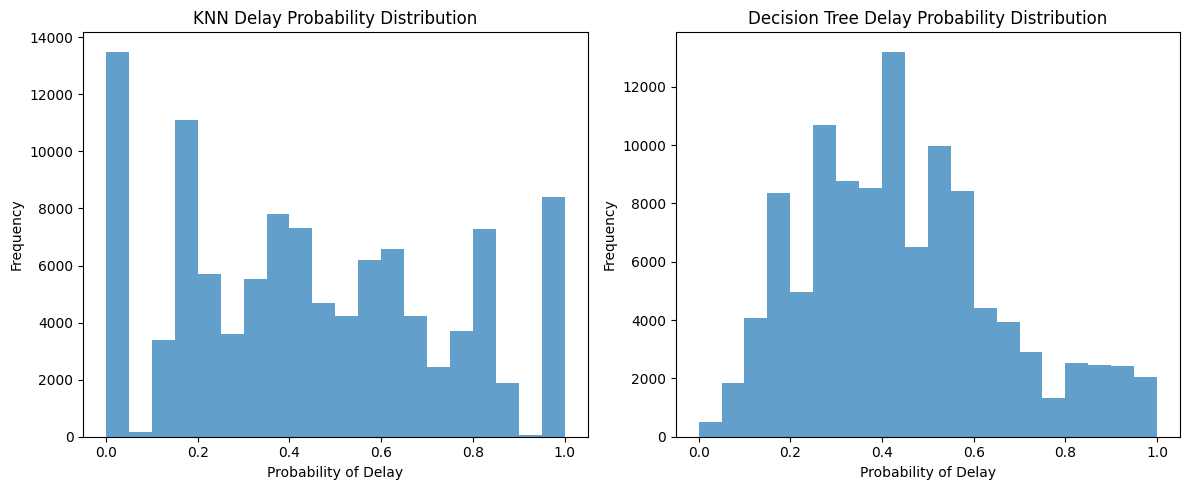

In [8]:
# Visualization of Probability Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("KNN Delay Probability Distribution")
plt.hist(knn_prob[:, 1], bins=20, alpha=0.7)
plt.xlabel("Probability of Delay")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.title("Decision Tree Delay Probability Distribution")
plt.hist(dt_prob[:, 1], bins=20, alpha=0.7)
plt.xlabel("Probability of Delay")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('../visualizations/delay_prob_distributions.png')